In [1]:
from Scraper import iniciar_driver, obtener_tiros_jugador, obtener_id_partidos_jugador, guardar_datos_csv
from Pista import shot_chart
import pandas as pd
import numpy as np

In [2]:
driver = iniciar_driver()
partidos_musa = obtener_id_partidos_jugador(driver,'30001170','2021')

In [3]:
driver = iniciar_driver()
tiros_musa = []
for i in partidos_musa:
    tiros_musa.extend(obtener_tiros_jugador(driver,'D. Musa',i))
driver.quit()

In [4]:
guardar_datos_csv(tiros_musa, f'Musa_2021_2022.csv')

Datos guardados en Musa_2021_2022.csv


In [5]:
df=pd.read_csv('Musa_2021_2022.csv')

# Transformacion lineal de las coordenadas de los tiros. 
df['coord_x']=df['x']
df['coord_y']=df['y']
df['y'] = np.where((df['coord_x'] - 24.750) * 6 < 1400,
                      (df['coord_x'] - 24.750) * 6,
                      abs((df['coord_x'] - 24.750) * 6 - 2800))
df['x'] = np.where((df['coord_x'] - 24.750) * 6 < 1400,
                      (df['coord_y'] - 141.25) * 6,
                      -(df['coord_y'] - 141.25) * 6)

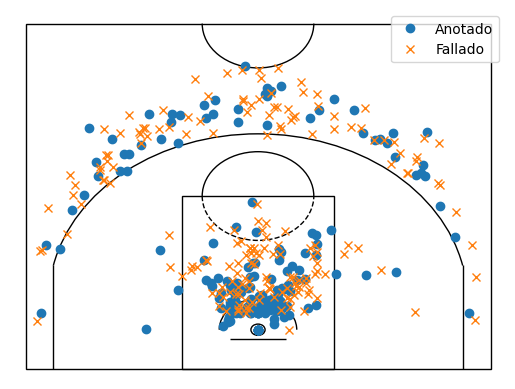

In [6]:
# Tiros realizados por Dzanan Musa durante su temporada de MVP (2021-2022)
shot_chart(df[df['Shot Made']==1],df[df['Shot Made']==0])